# SINGLE TRACKING  ANALYSIS 

# IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import LogNorm
import datetime
import time

# DATA 

## FILENAMES 

In [2]:
FILE_BASE = '/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/'

# OVERALL STATISTICS
CHI2N = 'chi2_N_statistics/{}-{}_pc_chi_n_df.csv'
DIST_AVG = 'dist_avg_statistics/{}-{}_pc_dist_avg_df.csv'
EXEC_TIME = 'exec_time_statistics/{}-{}_pc_ecec_time_df.csv'

# RP SPECIFIC
TOP_20 = 'TOP_20/'
HOR_22 = 'HOR_22/'

# RP STATISTICS
TOTAL_STRIP_20 = TOP_20 + 'total_strip/{}-{}_pc_total_strip_20_df.csv'
TOTAL_STRIP_22 = HOR_22 + 'total_strip/{}-{}_pc_total_strip_22_df.csv'
X_STRIP_20 = TOP_20 + 'x_strip/0-49_pc_x_strip_20_df.csv'
X_STRIP_22 = HOR_22 + 'x_strip/0-49_pc_x_strip_22_df.csv'
Y_STRIP_20 = TOP_20 + 'y_strip/0-49_pc_y_strip_20_df.csv'
Y_STRIP_22 = HOR_22 + 'y_strip/0-49_pc_y_strip_22_df.csv'


# CSV_TEMPLATES
CHI2N_CSV = FILE_BASE + CHI2N 
DIST_AVG_CSV = FILE_BASE + DIST_AVG 
EXEC_TIME_CSV = FILE_BASE + EXEC_TIME 
TOTAL_STRIP_20_CSV = FILE_BASE + TOTAL_STRIP_20 
TOTAL_STRIP_22_CSV = FILE_BASE + TOTAL_STRIP_22 
X_STRIP_20_CSV = FILE_BASE + X_STRIP_20 
X_STRIP_22_CSV = FILE_BASE + X_STRIP_22 
Y_STRIP_20_CSV = FILE_BASE + Y_STRIP_20 
Y_STRIP_22_CSV = FILE_BASE + Y_STRIP_22 


print(CHI2N_CSV)
print(DIST_AVG_CSV)
print(EXEC_TIME_CSV)
print(TOTAL_STRIP_20_CSV)
print(TOTAL_STRIP_22_CSV)
print(X_STRIP_20_CSV)
print(X_STRIP_22_CSV)
print(Y_STRIP_20_CSV)
print(Y_STRIP_22_CSV)

/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/chi2_N_statistics/{}-{}_pc_chi_n_df.csv
/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/dist_avg_statistics/{}-{}_pc_dist_avg_df.csv
/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/exec_time_statistics/{}-{}_pc_ecec_time_df.csv
/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/TOP_20/total_strip/{}-{}_pc_total_strip_20_df.csv
/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/HOR_22/total_strip/{}-{}_pc_total_strip_22_df.csv
/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/TOP_20/x_strip/0-49_pc_x_strip_20_df.csv
/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_mul

## DATAFRAMES CACHE 

In [3]:
# DATAFRAME NAMES
DF_NAME_CHI2N = 'DF_NAME_CHI2N'
DF_NAME_DIST_AVG = 'DF_NAME_DIST_AVG'
DF_NAME_EXEC_TIME = 'DF_NAME_EXEC_TIME'
DF_NAME_TOTAL_STRIP_20 = 'DF_NAME_TOTAL_STRIP_20'
DF_NAME_TOTAL_STRIP_22 = 'DF_NAME_TOTAL_STRIP_22'
DF_NAME_X_STRIP_20 = 'DF_NAME_X_STRIP_20'
DF_NAME_X_STRIP_22 = 'DF_NAME_X_STRIP_22'
DF_NAME_Y_STRIP_20 = 'DF_NAME_Y_STRIP_20'
DF_NAME_Y_STRIP_22 = 'DF_NAME_Y_STRIP_22'


DF_CACHE = {
    DF_NAME_CHI2N : None,
    DF_NAME_DIST_AVG : None,
    DF_NAME_EXEC_TIME : None,
    DF_NAME_TOTAL_STRIP_20 : None,
    DF_NAME_TOTAL_STRIP_22 : None,
    DF_NAME_X_STRIP_20 : None,
    DF_NAME_X_STRIP_22 : None,
    DF_NAME_Y_STRIP_20 : None,
    DF_NAME_Y_STRIP_22 : None
}

## DATAFRAMES TRANSLATIONS 

In [4]:
DF_NAME_TO_CSV_TEMPLATE = {
    DF_NAME_CHI2N : CHI2N_CSV,
    DF_NAME_DIST_AVG : DIST_AVG_CSV,
    DF_NAME_EXEC_TIME : EXEC_TIME_CSV,
    DF_NAME_TOTAL_STRIP_20 : TOTAL_STRIP_20_CSV,
    DF_NAME_TOTAL_STRIP_22 : TOTAL_STRIP_22_CSV,
    DF_NAME_X_STRIP_20 : X_STRIP_20_CSV,
    DF_NAME_X_STRIP_22 : X_STRIP_22_CSV,
    DF_NAME_Y_STRIP_20 : Y_STRIP_20_CSV,
    DF_NAME_Y_STRIP_22 : Y_STRIP_22_CSV
}

DF_NAME_TO_COLUMN = {
    DF_NAME_CHI2N : 'chi2_N',
    DF_NAME_DIST_AVG : 'dist_avg',
    DF_NAME_EXEC_TIME : 'exec_time[s]',
    DF_NAME_TOTAL_STRIP_20 : 'diff_total [strip]',
    DF_NAME_TOTAL_STRIP_22 : 'diff_total [strip]',
    DF_NAME_X_STRIP_20 : 'diff_x [strip]',
    DF_NAME_X_STRIP_22 : 'diff_x [strip]',
    DF_NAME_Y_STRIP_20 : 'diff_y [strip]',
    DF_NAME_Y_STRIP_22 : 'diff_y [strip]'
}

DF_NAME_TO_BINS = {
    DF_NAME_CHI2N: np.arange(0.0, 100.0, 1.0),
    DF_NAME_DIST_AVG: np.arange(0.0, 12.5, 0.1),
    DF_NAME_EXEC_TIME: np.arange(0.0, 1.0, 0.01),
    DF_NAME_TOTAL_STRIP_20: np.arange(0.0, 100.0, 1.0),
    DF_NAME_TOTAL_STRIP_22: np.arange(0.0, 100.0, 1.0),
    DF_NAME_X_STRIP_20: np.arange(0.0, 100.0, 1.0),
    DF_NAME_X_STRIP_22: np.arange(0.0, 100.0, 1.0),
    DF_NAME_Y_STRIP_20: np.arange(0.0, 100.0, 1.0),
    DF_NAME_Y_STRIP_22: np.arange(0.0, 100.0, 1.0)
}


DF_NAME_TO_X_LABEL = {
    DF_NAME_CHI2N: 'Normalized Chi2 statistics',
    DF_NAME_DIST_AVG: 'Average distance [mm]',
    DF_NAME_EXEC_TIME: 'Fitting time [s]',
    DF_NAME_TOTAL_STRIP_20: 'Difference [strip units]',
    DF_NAME_TOTAL_STRIP_22: 'Difference [strip units]',
    DF_NAME_X_STRIP_20: 'Difference [strip units]',
    DF_NAME_X_STRIP_22: 'Difference [strip units]',
    DF_NAME_Y_STRIP_20: 'Difference [strip units]',
    DF_NAME_Y_STRIP_22: 'Difference [strip units]'
}


DF_NAME_TO_COLOR = {
    DF_NAME_CHI2N: None,
    DF_NAME_DIST_AVG: None,
    DF_NAME_EXEC_TIME: None,
    DF_NAME_TOTAL_STRIP_20: [0.50, 0.8, 0.1, 1],
    DF_NAME_TOTAL_STRIP_22: [1.00, 0.0, 0.0, 1],
    DF_NAME_X_STRIP_20: [0.50, 0.8, 0.1, 1],
    DF_NAME_X_STRIP_22: [1.00, 0.0, 0.0, 1],
    DF_NAME_Y_STRIP_20: [0.50, 0.8, 0.1, 1],
    DF_NAME_Y_STRIP_22: [1.00, 0.0, 0.0, 1]
}

DF_NAME_TO_TITLE = {
    DF_NAME_CHI2N: 'Normalized Chi2 statistics.\nTracks reconstructed by multitracking algorithm.',
    DF_NAME_DIST_AVG: 'Average distance between track and activated strips.\nTracks reconstructed by new algorithm.',
    DF_NAME_EXEC_TIME: 'Time of track reconstruction\n(fitting phase of multitracking algorithm)',
    DF_NAME_TOTAL_STRIP_20: 'Total difference of hits positions \nreconstructed by TOTEM and multitacking algorithm \nin RP 20 (vertical) at z = -214.628[mm]',
    DF_NAME_TOTAL_STRIP_22: 'Total difference of hits positions \nreconstructed by TOTEM and multitacking algorithm \nin RP 22 (horizontal) at z = -215.078[mm]' ,
    DF_NAME_X_STRIP_20: 'Difference of "x" coordinate for hits \nreconstructed by TOTEM and multitacking algorithm \nin RP 20 (vertical) at z = -214.628[mm]',
    DF_NAME_X_STRIP_22: 'Difference of "x" coordinate for hits \nreconstructed by TOTEM and multitacking algorithm \nin RP 22 (horizontal) at z = -215.078[mm]',
    DF_NAME_Y_STRIP_20: 'Difference of "y" coordinate for hits \nreconstructed by TOTEM and multitacking algorithm \nin RP 20 (vertical) at z = -214.628[mm]',
    DF_NAME_Y_STRIP_22: 'Difference of "y" coordinate for hits \nreconstructed by TOTEM and multitacking algorithm \nin RP 22 (horizontal) at z = -215.078[mm]'
}


DF_NAME_TO_PNG_FILE = {
    DF_NAME_CHI2N : 'CHI2N.png',
    DF_NAME_DIST_AVG : 'DIST_AVG.png',
    DF_NAME_EXEC_TIME : 'EXEC_TIME.png',
    DF_NAME_TOTAL_STRIP_20 : 'TOTAL_STRIP_20.png',
    DF_NAME_TOTAL_STRIP_22 : 'TOTAL_STRIP_22.png',
    DF_NAME_X_STRIP_20 : 'X_STRIP_20.png',
    DF_NAME_X_STRIP_22 : 'X_STRIP_22.png',
    DF_NAME_Y_STRIP_20 : 'Y_STRIP_20.png',
    DF_NAME_Y_STRIP_22 : 'Y_STRIP_22.png'
}

## LOAD DATAFRAMES 

In [5]:
# CONFIG
DF_NAMES_TO_LOAD = [ DF_NAME_CHI2N, DF_NAME_DIST_AVG, DF_NAME_EXEC_TIME, DF_NAME_TOTAL_STRIP_20, DF_NAME_TOTAL_STRIP_22, 
                     DF_NAME_X_STRIP_20, DF_NAME_X_STRIP_22, DF_NAME_Y_STRIP_20, DF_NAME_Y_STRIP_22] 

RECO_STARTS = range(0, 1600, 50)
RECO_ENDS = [reco_start + 49 for reco_start in RECO_STARTS]
print(RECO_STARTS)
print(RECO_ENDS)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550]
[49, 99, 149, 199, 249, 299, 349, 399, 449, 499, 549, 599, 649, 699, 749, 799, 849, 899, 949, 999, 1049, 1099, 1149, 1199, 1249, 1299, 1349, 1399, 1449, 1499, 1549, 1599]


In [6]:
def get_from_parts_df(df_name):
    print("Combining df: {}".format(df_name))
    combined_df = None
    
    for idx in range(len(RECO_STARTS)):
        reco_start = RECO_STARTS[idx]
        reco_end = RECO_ENDS[idx]
        
        print("\tAppend from: {}-{}".format(reco_start, reco_end))
        print("\t{}".format(datetime.datetime.now().time()))
        
        new_csv = DF_NAME_TO_CSV_TEMPLATE[df_name].format(reco_start, reco_end)
        new_df = pd.read_csv(new_csv)
        combined_df = pd.concat([combined_df, new_df])

    return combined_df

In [7]:
def load_dfs():
    for df_name in DF_NAMES_TO_LOAD:
        DF_CACHE[df_name] = get_from_parts_df(df_name)

In [8]:
# load_dfs()
DF_CACHE

{'DF_NAME_CHI2N': None,
 'DF_NAME_DIST_AVG': None,
 'DF_NAME_EXEC_TIME': None,
 'DF_NAME_TOTAL_STRIP_20': None,
 'DF_NAME_TOTAL_STRIP_22': None,
 'DF_NAME_X_STRIP_20': None,
 'DF_NAME_X_STRIP_22': None,
 'DF_NAME_Y_STRIP_20': None,
 'DF_NAME_Y_STRIP_22': None}

# PLOTS 

In [9]:
def save_bin_result(df_name, stats_png_base, bin_result=None, total_number=None):
#     print(bin_result)
#     print(bin_result.__class__)
#     arr_values = bin_result[0]
#     arr_bins = bin_result[1]
#     print("values: {} bins: {}".format(len(arr_values), len(arr_bins)))
    
    bin_values = bin_result[0]
    bin_starts = bin_result[1][:-1]
    bin_percent = [float(value) / total_number * 100 for value in bin_values]
    bin_stack_percent = [sum(bin_percent[:idx+1]) for idx in range(len(bin_percent))]
    
    pd_dict = {
        'bin_values' : bin_values,
        'bin_starts' : bin_starts,
        'bin_percent' : bin_percent,
        'bin_stack_percent' : bin_stack_percent
    }
    
    df = pd.DataFrame(data=pd_dict)
    df_filename_csv = stats_png_base + df_name + '.csv'
    df.to_csv(df_filename_csv)
    
    

In [10]:
def plot_statistics(df_name): 
    stats_png_base = '/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/plots/statistics/'
    
#     df = DF_CACHE[df_name]
    df = get_from_parts_df(df_name)
    print("Total lenght: {}".format(len(df)))
    column = DF_NAME_TO_COLUMN[df_name]
    bins = DF_NAME_TO_BINS[df_name]
    x_label = DF_NAME_TO_X_LABEL[df_name]
    color = DF_NAME_TO_COLOR[df_name]
    title = DF_NAME_TO_TITLE[df_name]
    
    sns.set(font_scale=1.5)
    figure(figsize=(12, 9), dpi=100)
    
    bin_result = plt.hist(df[column], bins=bins, color=color)
    save_bin_result(df_name, stats_png_base, bin_result=bin_result, total_number=len(df))
    
    plt.yscale('log', nonposy='clip')
    plt.xlabel(x_label)
    plt.ylabel('Number of tracks')
    plt.title(title)
    
    # Create filename
    stats_png_filename = stats_png_base + DF_NAME_TO_PNG_FILE[df_name]
    plt.savefig(stats_png_filename) 
    
    plt.show()

In [11]:
def plot_all_statistics():
    for df_name in DF_NAMES_TO_LOAD:
        print("Plotting: {} starts at {}".format(df_name, datetime.datetime.now().time()))
        time_start = time.time()
        plot_statistics(df_name)
        time_exec = time.time() - time_start
        print("\tPlotted in: {} [s]".format(time_exec))

Plotting: DF_NAME_CHI2N starts at 23:11:14.982356
Combining df: DF_NAME_CHI2N
	Append from: 0-49
	23:11:14.982865
	Append from: 50-99
	23:11:21.260429
	Append from: 100-149
	23:11:34.966939
	Append from: 150-199
	23:11:47.069097
	Append from: 200-249
	23:12:09.994071
	Append from: 250-299
	23:12:23.152044
	Append from: 300-349
	23:12:36.727047
	Append from: 350-399
	23:12:55.416666
	Append from: 400-449
	23:13:09.885049
	Append from: 450-499
	23:13:23.394232
	Append from: 500-549
	23:13:39.979002
	Append from: 550-599
	23:13:54.809646
	Append from: 600-649
	23:14:10.108579
	Append from: 650-699
	23:14:28.509889
	Append from: 700-749
	23:14:43.826994
	Append from: 750-799
	23:14:59.033479
	Append from: 800-849
	23:15:14.111713
	Append from: 850-899
	23:15:30.149252
	Append from: 900-949
	23:15:46.226272
	Append from: 950-999
	23:16:02.262372
	Append from: 1000-1049
	23:16:16.434850
	Append from: 1050-1099
	23:16:29.868804
	Append from: 1100-1149
	23:16:47.693412
	Append from: 1150-1199


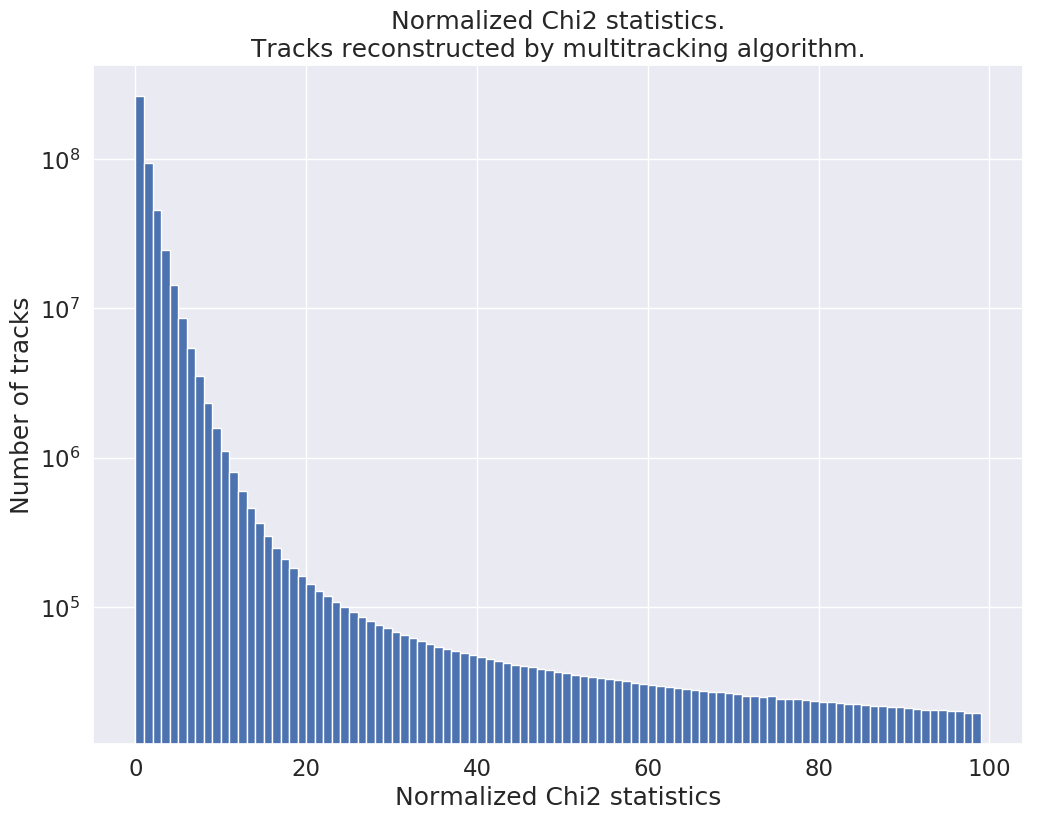

	Plotted in: 819.883256197 [s]
Plotting: DF_NAME_DIST_AVG starts at 23:24:54.866245
Combining df: DF_NAME_DIST_AVG
	Append from: 0-49
	23:24:54.866482
	Append from: 50-99
	23:25:12.633445
	Append from: 100-149
	23:25:26.373386
	Append from: 150-199
	23:25:47.880561
	Append from: 200-249
	23:26:02.898825
	Append from: 250-299
	23:26:17.325003
	Append from: 300-349
	23:26:32.309923
	Append from: 350-399
	23:26:46.804295
	Append from: 400-449
	23:27:02.023489
	Append from: 450-499
	23:27:31.222978
	Append from: 500-549
	23:27:45.985228
	Append from: 550-599
	23:28:01.302440
	Append from: 600-649
	23:28:16.129282
	Append from: 650-699
	23:28:31.165786
	Append from: 700-749
	23:28:45.525376
	Append from: 750-799
	23:29:03.929029
	Append from: 800-849
	23:29:19.369313
	Append from: 850-899
	23:29:35.850579
	Append from: 900-949
	23:29:52.524722
	Append from: 950-999
	23:30:09.455608
	Append from: 1000-1049
	23:30:26.042885
	Append from: 1050-1099
	23:30:42.415112
	Append from: 1100-1149
	23:

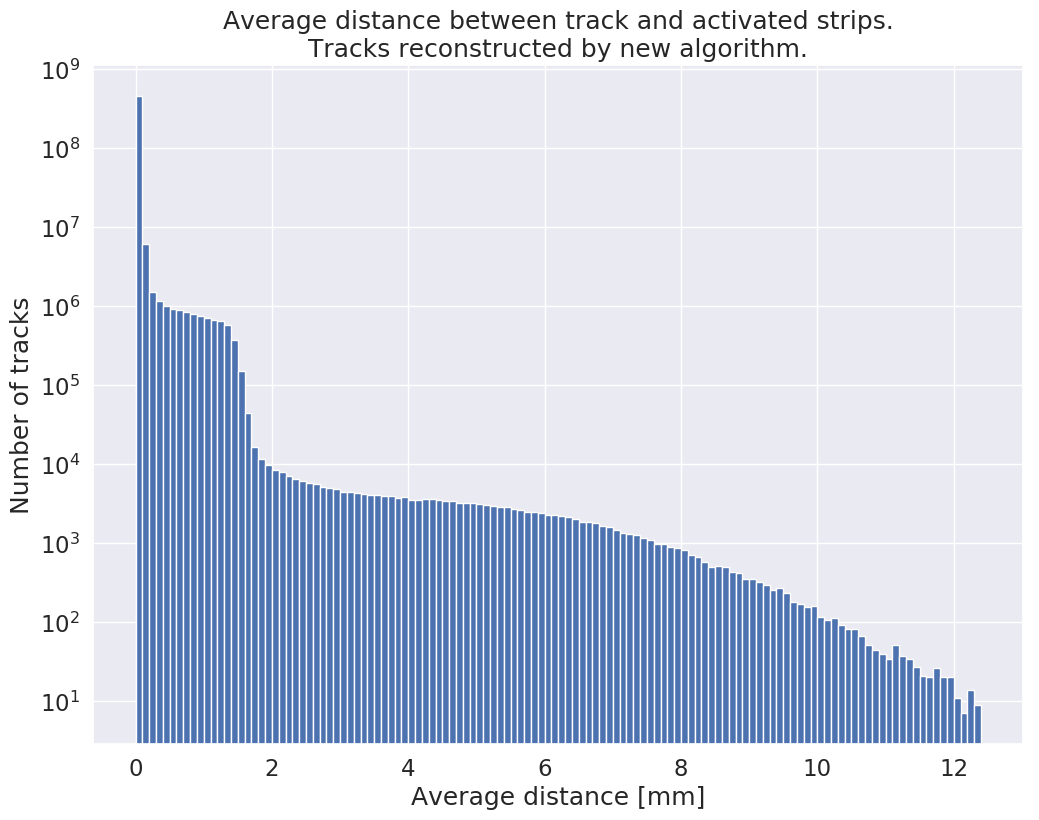

	Plotted in: 1156.43880391 [s]
Plotting: DF_NAME_EXEC_TIME starts at 23:44:11.305656
Combining df: DF_NAME_EXEC_TIME
	Append from: 0-49
	23:44:11.350025
	Append from: 50-99
	23:44:25.917021
	Append from: 100-149
	23:44:40.809890
	Append from: 150-199
	23:44:55.702424
	Append from: 200-249
	23:45:12.051324
	Append from: 250-299
	23:45:49.755982
	Append from: 300-349
	23:46:06.108085
	Append from: 350-399
	23:46:21.190379
	Append from: 400-449
	23:46:54.204285
	Append from: 450-499
	23:47:09.316610
	Append from: 500-549
	23:47:24.778516
	Append from: 550-599
	23:47:40.072053
	Append from: 600-649
	23:47:56.194252
	Append from: 650-699
	23:48:11.574202
	Append from: 700-749
	23:48:27.541922
	Append from: 750-799
	23:48:44.015744
	Append from: 800-849
	23:49:00.484715
	Append from: 850-899
	23:49:17.275237
	Append from: 900-949
	23:49:34.366371
	Append from: 950-999
	23:49:52.369306
	Append from: 1000-1049
	23:50:11.213768
	Append from: 1050-1099
	23:50:30.773589
	Append from: 1100-1149
	2

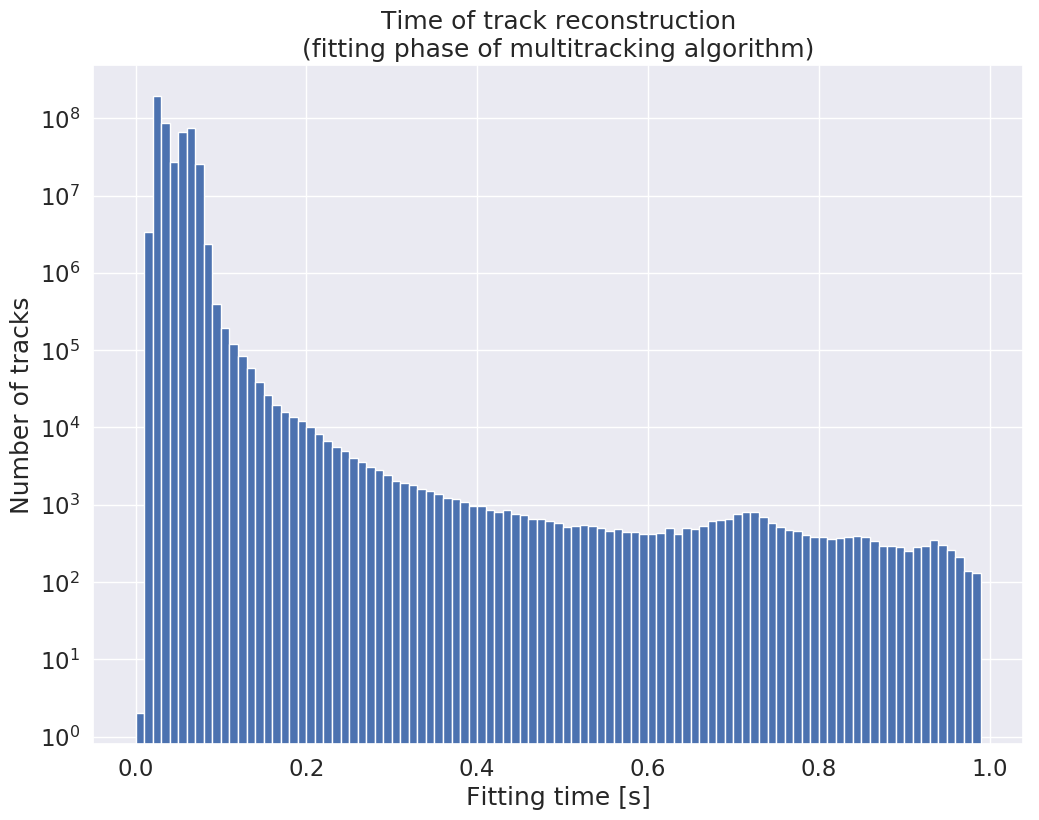

	Plotted in: 965.160108089 [s]
Plotting: DF_NAME_TOTAL_STRIP_20 starts at 00:00:16.510283
Combining df: DF_NAME_TOTAL_STRIP_20
	Append from: 0-49
	00:00:16.524418
	Append from: 50-99
	00:00:18.640259
	Append from: 100-149
	00:00:20.803602
	Append from: 150-199
	00:00:22.841221
	Append from: 200-249
	00:00:24.749697
	Append from: 250-299
	00:00:26.569239
	Append from: 300-349
	00:00:28.523010
	Append from: 350-399
	00:00:30.684346
	Append from: 400-449
	00:00:32.782394
	Append from: 450-499
	00:00:35.887992
	Append from: 500-549
	00:00:38.090254
	Append from: 550-599
	00:00:41.290487
	Append from: 600-649
	00:00:43.545239
	Append from: 650-699
	00:00:45.675224
	Append from: 700-749
	00:00:48.030984
	Append from: 750-799
	00:00:50.302384
	Append from: 800-849
	00:00:52.827810
	Append from: 850-899
	00:00:55.127492
	Append from: 900-949
	00:00:58.768642
	Append from: 950-999
	00:01:01.646190
	Append from: 1000-1049
	00:01:04.270519
	Append from: 1050-1099
	00:01:06.974024
	Append from: 11

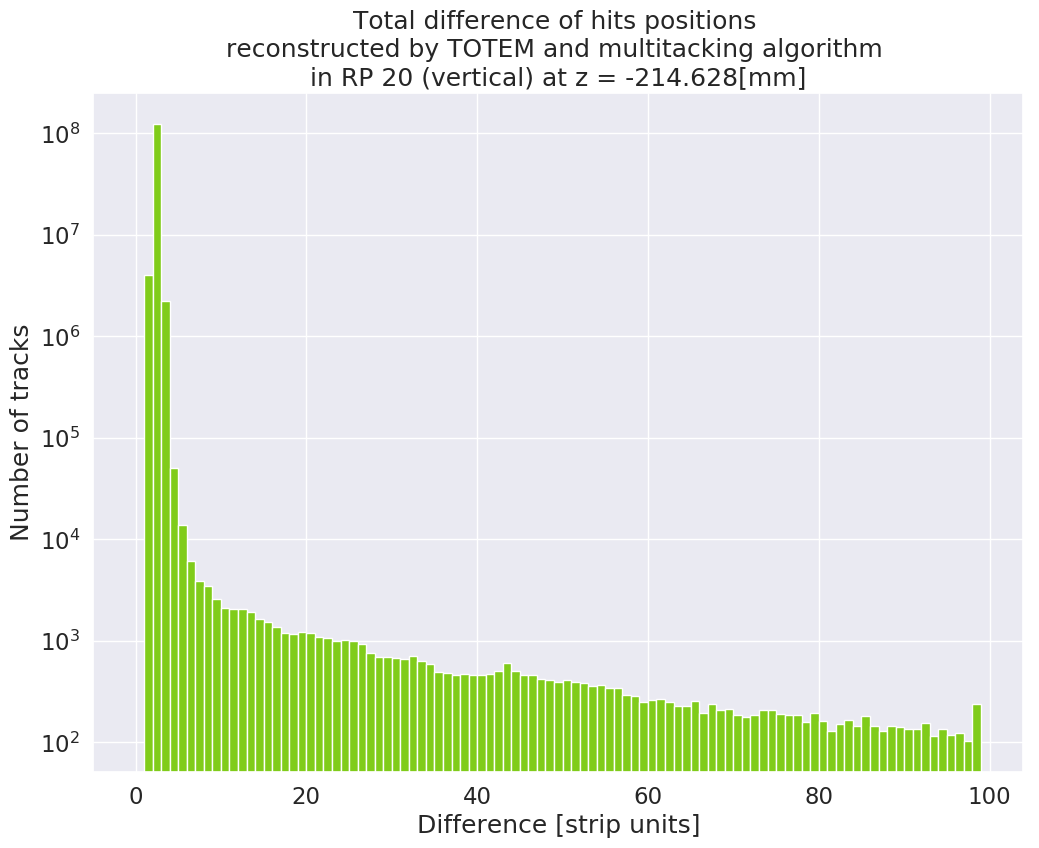

	Plotted in: 86.6716899872 [s]
Plotting: DF_NAME_TOTAL_STRIP_22 starts at 00:01:43.182582
Combining df: DF_NAME_TOTAL_STRIP_22
	Append from: 0-49
	00:01:43.218706
	Append from: 50-99
	00:01:43.379334
	Append from: 100-149
	00:01:43.491889
	Append from: 150-199
	00:01:43.616380
	Append from: 200-249
	00:01:43.732746
	Append from: 250-299
	00:01:43.843627
	Append from: 300-349
	00:01:44.048761
	Append from: 350-399
	00:01:44.159922
	Append from: 400-449
	00:01:44.259232
	Append from: 450-499
	00:01:44.338385
	Append from: 500-549
	00:01:44.429454
	Append from: 550-599
	00:01:44.547957
	Append from: 600-649
	00:01:44.622004
	Append from: 650-699
	00:01:44.697764
	Append from: 700-749
	00:01:44.795138
	Append from: 750-799
	00:01:44.872431
	Append from: 800-849
	00:01:45.017081
	Append from: 850-899
	00:01:45.087943
	Append from: 900-949
	00:01:45.185875
	Append from: 950-999
	00:01:45.263078
	Append from: 1000-1049
	00:01:45.340100
	Append from: 1050-1099
	00:01:45.502165
	Append from: 11

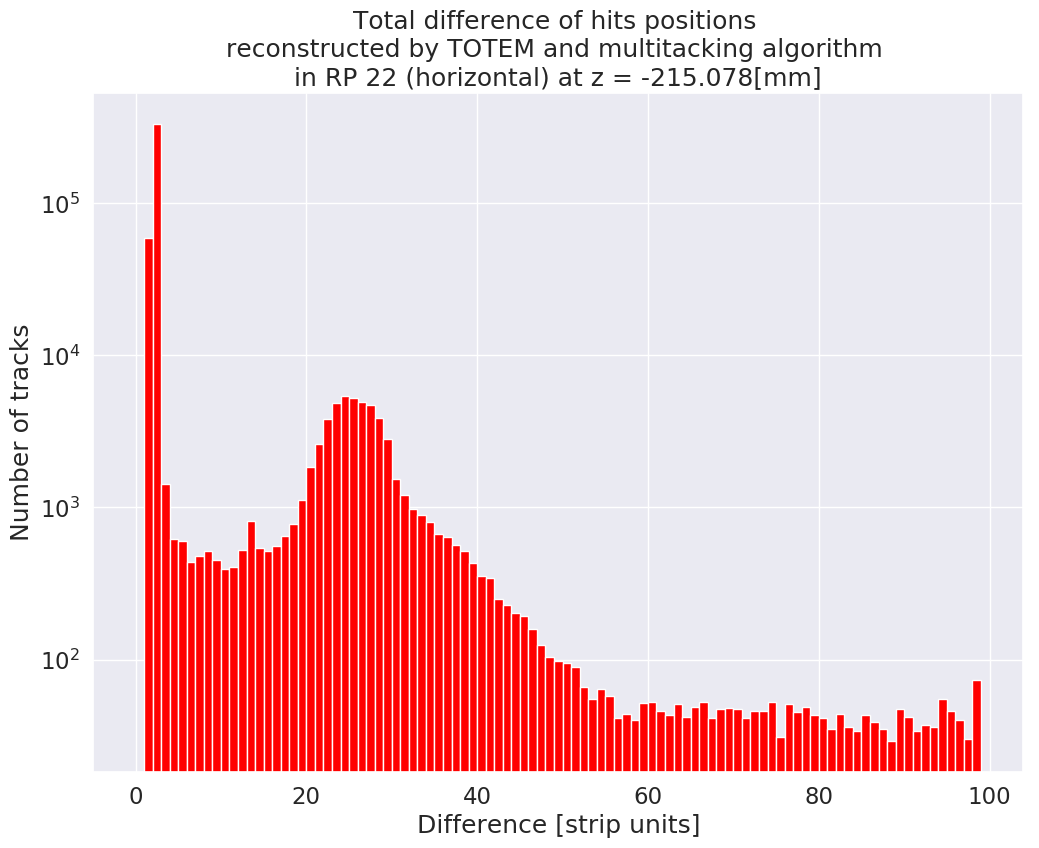

	Plotted in: 8.37363386154 [s]
Plotting: DF_NAME_X_STRIP_20 starts at 00:01:51.556594
Combining df: DF_NAME_X_STRIP_20
	Append from: 0-49
	00:01:51.557147
	Append from: 50-99
	00:01:54.741266
	Append from: 100-149
	00:01:55.831143
	Append from: 150-199
	00:01:56.985258
	Append from: 200-249
	00:01:58.211468
	Append from: 250-299
	00:01:59.226350
	Append from: 300-349
	00:02:00.297098
	Append from: 350-399
	00:02:01.573379
	Append from: 400-449
	00:02:02.756409
	Append from: 450-499
	00:02:04.062202
	Append from: 500-549
	00:02:05.441076
	Append from: 550-599
	00:02:06.740465
	Append from: 600-649
	00:02:08.148827
	Append from: 650-699
	00:02:09.444484
	Append from: 700-749
	00:02:10.965412
	Append from: 750-799
	00:02:12.296166
	Append from: 800-849
	00:02:13.797078
	Append from: 850-899
	00:02:15.280183
	Append from: 900-949
	00:02:16.877299
	Append from: 950-999
	00:02:18.464871
	Append from: 1000-1049
	00:02:19.980589
	Append from: 1050-1099
	00:02:21.586816
	Append from: 1100-1149


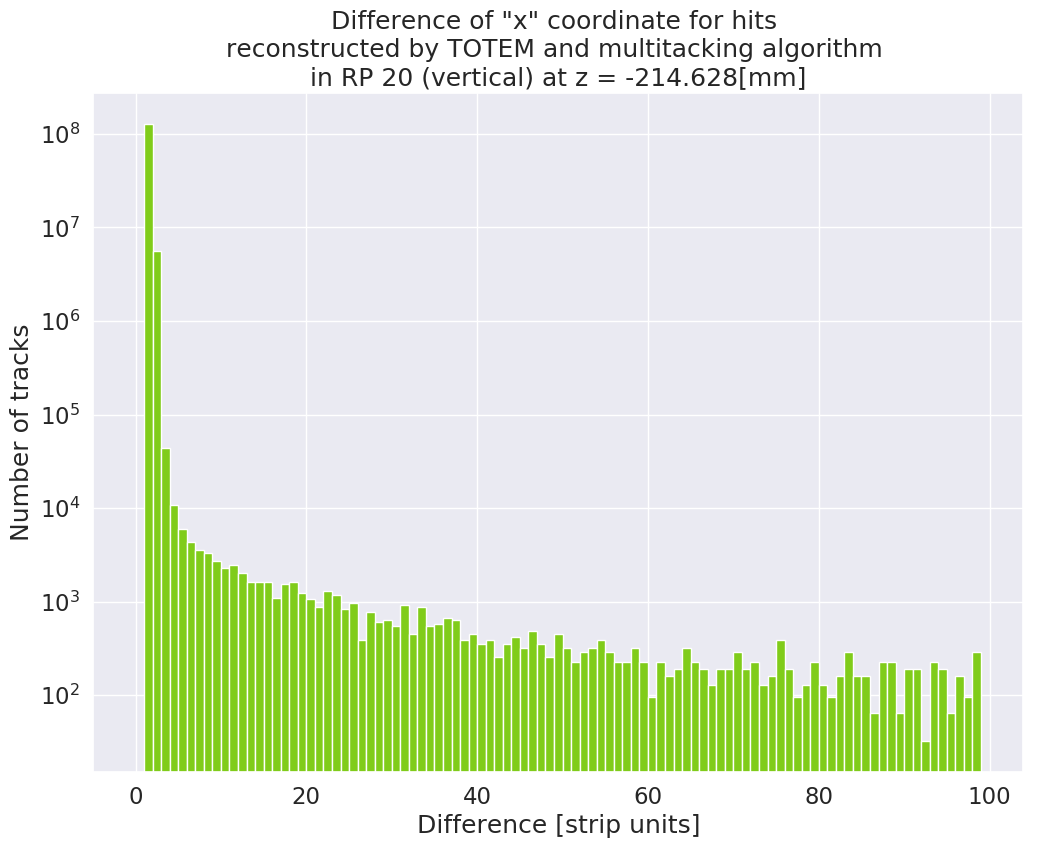

	Plotted in: 54.0842959881 [s]
Plotting: DF_NAME_X_STRIP_22 starts at 00:02:45.641366
Combining df: DF_NAME_X_STRIP_22
	Append from: 0-49
	00:02:45.641779
	Append from: 50-99
	00:02:45.795845
	Append from: 100-149
	00:02:45.844185
	Append from: 150-199
	00:02:45.888837
	Append from: 200-249
	00:02:45.932493
	Append from: 250-299
	00:02:45.977049
	Append from: 300-349
	00:02:46.036955
	Append from: 350-399
	00:02:46.082021
	Append from: 400-449
	00:02:46.128094
	Append from: 450-499
	00:02:46.174104
	Append from: 500-549
	00:02:46.220784
	Append from: 550-599
	00:02:46.276083
	Append from: 600-649
	00:02:46.333682
	Append from: 650-699
	00:02:46.380051
	Append from: 700-749
	00:02:46.427260
	Append from: 750-799
	00:02:46.473063
	Append from: 800-849
	00:02:46.521189
	Append from: 850-899
	00:02:46.586462
	Append from: 900-949
	00:02:46.637046
	Append from: 950-999
	00:02:46.687188
	Append from: 1000-1049
	00:02:46.738840
	Append from: 1050-1099
	00:02:46.789930
	Append from: 1100-1149


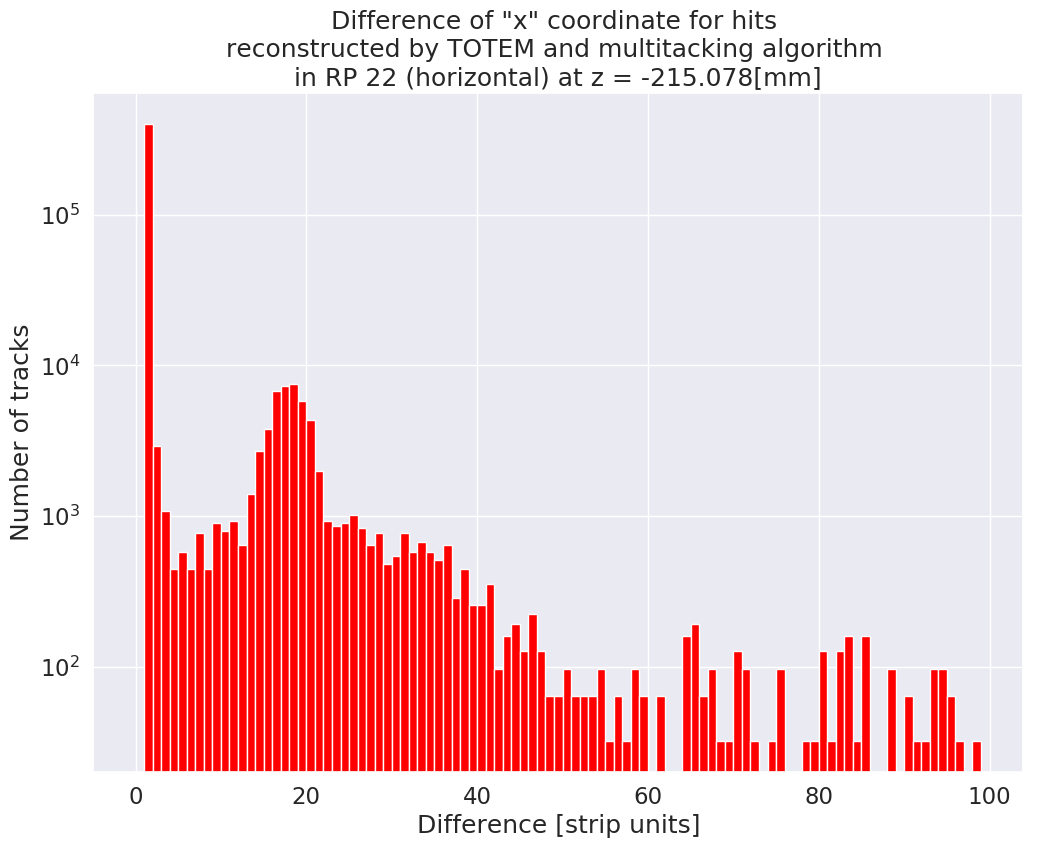

	Plotted in: 3.06866002083 [s]
Plotting: DF_NAME_Y_STRIP_20 starts at 00:02:48.710469
Combining df: DF_NAME_Y_STRIP_20
	Append from: 0-49
	00:02:48.710946
	Append from: 50-99
	00:02:51.311515
	Append from: 100-149
	00:02:52.331404
	Append from: 150-199
	00:02:53.208946
	Append from: 200-249
	00:02:54.122984
	Append from: 250-299
	00:02:55.068306
	Append from: 300-349
	00:02:56.023914
	Append from: 350-399
	00:02:57.063056
	Append from: 400-449
	00:02:58.258085
	Append from: 450-499
	00:02:59.352987
	Append from: 500-549
	00:03:00.554107
	Append from: 550-599
	00:03:01.794695
	Append from: 600-649
	00:03:03.222026
	Append from: 650-699
	00:03:04.535690
	Append from: 700-749
	00:03:05.773478
	Append from: 750-799
	00:03:07.191150
	Append from: 800-849
	00:03:08.861702
	Append from: 850-899
	00:03:10.750544
	Append from: 900-949
	00:03:12.491271
	Append from: 950-999
	00:03:14.099295
	Append from: 1000-1049
	00:03:15.955745
	Append from: 1050-1099
	00:03:17.700192
	Append from: 1100-1149


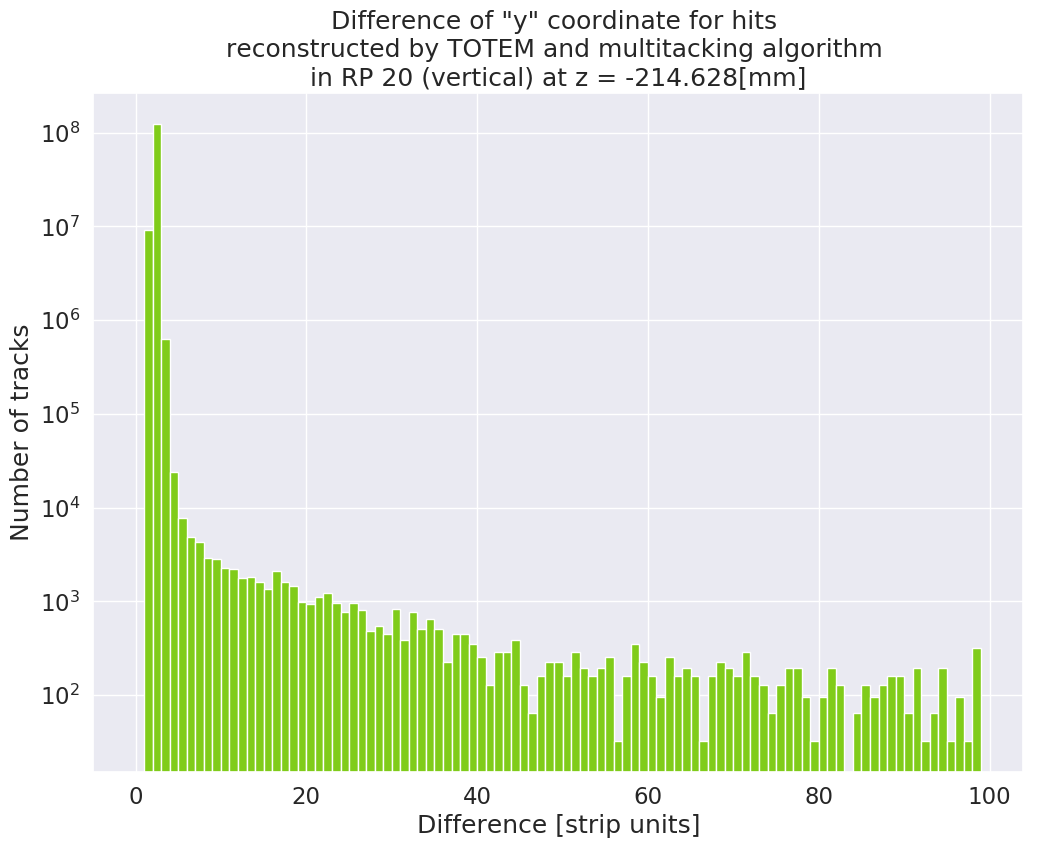

	Plotted in: 52.3399019241 [s]
Plotting: DF_NAME_Y_STRIP_22 starts at 00:03:41.050918
Combining df: DF_NAME_Y_STRIP_22
	Append from: 0-49
	00:03:41.051303
	Append from: 50-99
	00:03:41.140831
	Append from: 100-149
	00:03:41.203945
	Append from: 150-199
	00:03:41.250096
	Append from: 200-249
	00:03:41.295484
	Append from: 250-299
	00:03:41.339698
	Append from: 300-349
	00:03:41.383661
	Append from: 350-399
	00:03:41.427543
	Append from: 400-449
	00:03:41.471079
	Append from: 450-499
	00:03:41.514709
	Append from: 500-549
	00:03:41.556917
	Append from: 550-599
	00:03:41.601536
	Append from: 600-649
	00:03:41.646476
	Append from: 650-699
	00:03:41.692051
	Append from: 700-749
	00:03:41.757531
	Append from: 750-799
	00:03:41.804237
	Append from: 800-849
	00:03:41.850444
	Append from: 850-899
	00:03:41.895299
	Append from: 900-949
	00:03:41.949782
	Append from: 950-999
	00:03:42.005352
	Append from: 1000-1049
	00:03:42.053438
	Append from: 1050-1099
	00:03:42.099977
	Append from: 1100-1149


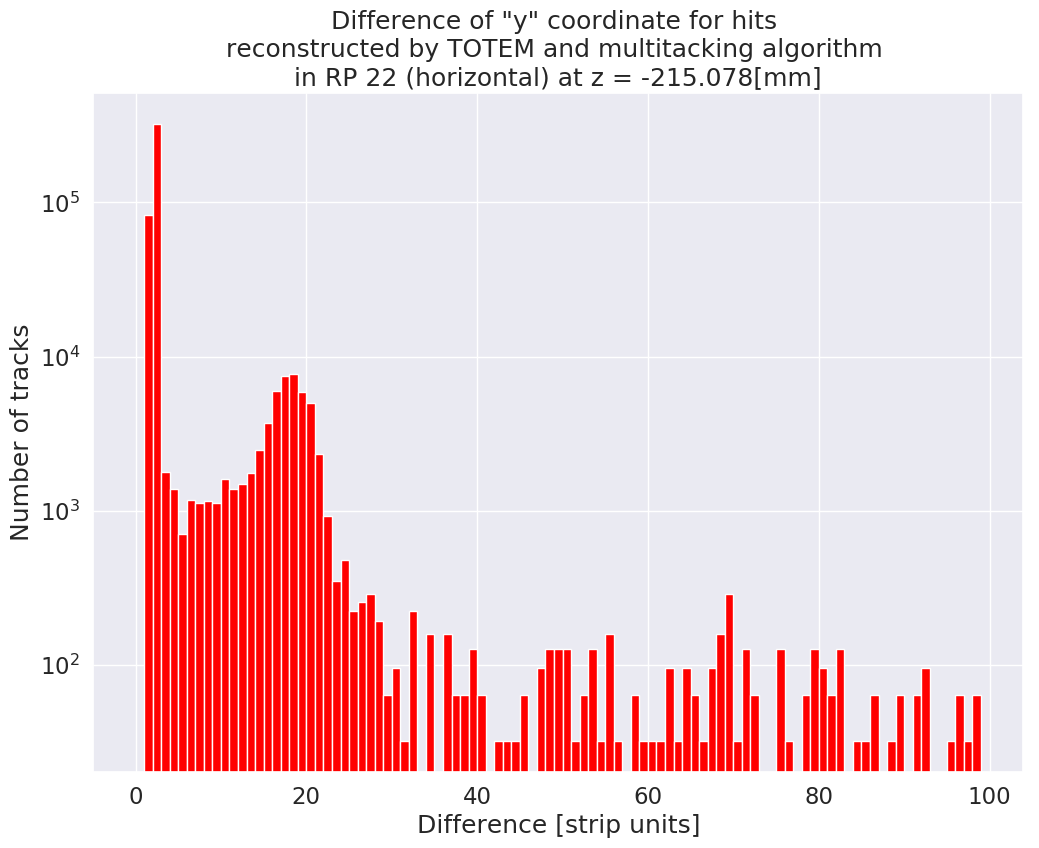

	Plotted in: 3.20059704781 [s]


In [12]:
plot_all_statistics()

In [13]:
df = pd.read_csv('/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/plots/statistics/' + 'DF_NAME_X_STRIP_22.csv')
df

,Unnamed: 0,bin_percent,bin_stack_percent,bin_starts,bin_values
0,0,0.000000,0.000000,0.0,0.0
1,1,84.610718,84.610718,1.0,401664.0
2,2,0.613414,85.224132,2.0,2912.0
3,3,0.229188,85.453320,3.0,1088.0
4,4,0.094371,85.547691,4.0,448.0
5,5,0.121335,85.669026,5.0,576.0
6,6,0.094371,85.763397,6.0,448.0
7,7,0.161780,85.925177,7.0,768.0
8,8,0.094371,86.019548,8.0,448.0
9,9,0.188743,86.208291,9.0,896.0
